In [2]:
import pandas as pd

What is the mean length of a Martian

In [29]:

iom = pd.read_csv('inhabitantsonmars.txt',decimal=".",header=None,sep="\s")
iom=iom.stack()
iom.mean()


C:\Users\filip\AppData\Local\Temp\ipykernel_27404\29102408.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  iom = pd.read_csv('inhabitantsonmars.txt',decimal=".",header=None,sep="\s")


51.94192246059993

What is the median?  What does it mean?

In [30]:
iom.median()

49.039410000000004

What is the average absolute deviation?  What does this mean?

In [33]:
abs(iom-iom.mean()).mean()
iom.mad()

14.989206867554575

What is the standard deviation?  What does this mean?

In [34]:
iom.std()

17.591455993919258

Determine the quartiles and the deciles

In [35]:
iom.quantile(q=(0.25,0.5,0.75))

0.25    38.085160
0.50    49.039410
0.75    66.800087
dtype: float64

In [43]:
import numpy as np
iom.quantile(q=(np.arange(0.1,1,0.1)))

0.1    30.476093
0.2    35.828414
0.3    40.148027
0.4    44.318592
0.5    49.039410
0.6    55.894136
0.7    63.343831
0.8    69.771876
0.9    76.488242
dtype: float64

20% of the Martians are smaller than ... cm (use the decile)
35 cms !!!!

In [44]:
iom.quantile(q=(np.arange(0.1,1,0.1)))

0.1    30.476093
0.2    35.828414
0.3    40.148027
0.4    44.318592
0.5    49.039410
0.6    55.894136
0.7    63.343831
0.8    69.771876
0.9    76.488242
dtype: float64

The percentage of Martians that is smaller than or equal to 60 cm is ... (experiment with
the quantiles to find this

In [47]:
iom.quantile(q=(np.arange(0.65,0.7,0.0001)))

0.6500    59.580193
0.6501    59.586424
0.6502    59.592233
0.6503    59.595929
0.6504    59.604584
            ...    
0.6995    63.326577
0.6996    63.329394
0.6997    63.331807
0.6998    63.335780
0.6999    63.342727
Length: 500, dtype: float64

65.5%

Draw a box plot.  What information do you see her

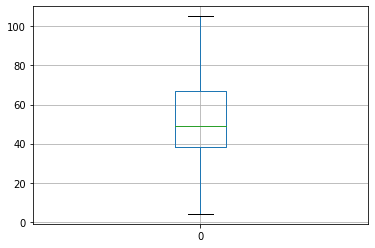

In [49]:
import matplotlib.pyplot as plt
plt.figure()
pd.DataFrame(iom).boxplot()
plt.show()

Make classes of 5 cm and determine the frequencies (let the classes start at 0 cm).  What is
the mode?

In [56]:
classes = pd.cut(iom,bins=range(0,int(iom.max())+5,5))
classes.mode()

0    (40, 45]
dtype: category
Categories (21, interval[int64, right]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (85, 90] < (90, 95] < (95, 100] < (100, 105]]

Make classes of 5 cm and draw a histogram.  What do you see?  How would you explain
this?  Do you see this when you make classes of 10 cm?

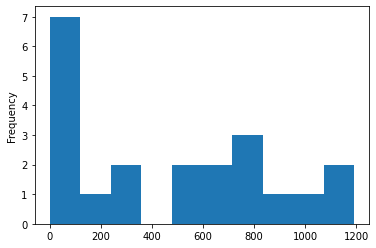

In [57]:
plt.figure()
classes.value_counts().sort_index().plot.hist(bins=)
plt.show()

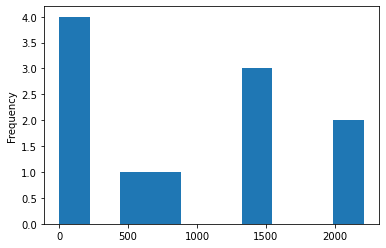

In [59]:
classes2 = pd.cut(iom,bins=range(0,int(iom.max())+10,10))
plt.figure()
classes2.value_counts().sort_index().plot.hist()
plt.show()

What are the mean lengths of a male Martian and a female Martian?

In [60]:

m = pd.read_csv('males.txt',decimal=".",header=None,sep="\s")
m=m.stack()

f = pd.read_csv('females.txt',decimal=".",header=None,sep="\s")
f=f.stack()

C:\Users\filip\AppData\Local\Temp\ipykernel_27404\2104915001.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  m = pd.read_csv('males.txt',decimal=".",header=None,sep="\s")
C:\Users\filip\AppData\Local\Temp\ipykernel_27404\2104915001.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  f = pd.read_csv('females.txt',decimal=".",header=None,sep="\s")


In [61]:
m.mean()

69.72959398000005

In [62]:
f.mean()

40.08347478100003

Calculate the medians

In [63]:
m.median()

69.72176999999999

In [64]:
f.median()

40.161865

Calculate the standard deviations

In [65]:
m.std()

10.033196526788284

In [66]:
f.std()

9.852915598834613

Determine the quartile

In [67]:
m.quantile(q=(0.25,0.5,0.75))

0.25    63.007897
0.50    69.721770
0.75    76.485118
dtype: float64

In [68]:
f.quantile(q=(0.25,0.5,0.75))

0.25    33.378650
0.50    40.161865
0.75    46.767148
dtype: float64

Make a box plot where you see these two distributions next to each other

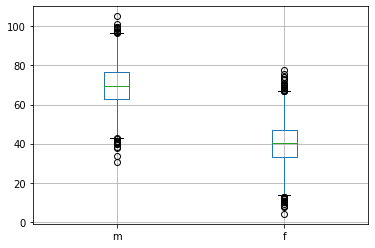

In [69]:
plt.figure()
fm = pd.DataFrame({'m':m,'f':f})
fm.boxplot()
plt.show()

Determine the limits for outliers for males and female

In [76]:
def outlier_boundaries(series: pd.Series(dtype=float), extreme: bool = False) -> list:
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    if extreme:
        iqr *= 3
    else:
        iqr *= 1.5
    return [q1 - iqr, q3 + iqr]
outlier_boundaries(m)

[42.792067499999995, 96.70094750000001]

In [77]:
outlier_boundaries(f)

[13.29590375, 66.84989375]